## Dataset

In [1]:
# Download Data

!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-10-12 19:20:18--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2022-10-12 19:20:18 (138 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [2]:
# Parse Data
import json

with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [7]:
print('Number of Sentences: ', len(sentences))
print('Number of    Labels: ', len(labels))


for i in range(5):
    print(sentences[i], labels[i])

Number of Sentences:  26709
Number of    Labels:  26709
former versace store clerk sues over secret 'black code' for minority shoppers 0
the 'roseanne' revival catches up to our thorny political mood, for better and worse 0
mom starting to fear son's web series closest thing she will have to grandchild 1
boehner just wants wife to listen, not come up with alternative debt-reduction ideas 1
j.k. rowling wishes snape happy birthday in the most magical way 0


## Hyperparameters

In [8]:
# Number of examples to use for training
training_size = 20000

# Vocabulary size of the tokenizer
vocab_size = 10000

# Maximum length of the padded sequences
max_length = 32

# Output dimensions of the Embedding layer
embedding_dim = 16

## Split the dataset

In [10]:
# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

print('Training Size: ', len(training_sentences))
print(' Testing Size: ', len( testing_sentences))

Training Size:  20000
 Testing Size:  6709


## Preprocessing the train and test sets

In [11]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters for padding and OOV tokens
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

print(word_index[:10])

In [13]:
# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

## Build and Compile the Model

In [14]:
import tensorflow as tf

# Initialize a GlobalAveragePooling1D (GAP1D) layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# Define sample array
sample_array = np.array([[[10,2],
                          [1,3],
                          [1,1]]])

# Print shape and contents of sample array
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array: {sample_array}')

shape of sample_array = (1, 3, 2)
sample array: [[[10  2]
  [ 1  3]
  [ 1  1]]]


In [15]:
# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')

output shape of gap1d_layer: (1, 2)
output array of gap1d_layer: [[4 2]]


In [16]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train the Model

In [18]:
history = model.fit(training_padded,
                    training_labels,
                    epochs=30,
                    validation_data=(testing_padded, testing_labels),
                    verbose=1)

Epoch 1/30
625/625 [==============================] - 4s 4ms/step - loss: 0.5767 - accuracy: 0.6824 - val_loss: 0.4025 - val_accuracy: 0.8363
Epoch 2/30
625/625 [==============================] - 2s 4ms/step - loss: 0.3133 - accuracy: 0.8723 - val_loss: 0.3456 - val_accuracy: 0.8553
Epoch 3/30
625/625 [==============================] - 2s 4ms/step - loss: 0.2338 - accuracy: 0.9080 - val_loss: 0.3497 - val_accuracy: 0.8471
Epoch 4/30
625/625 [==============================] - 3s 4ms/step - loss: 0.1872 - accuracy: 0.9293 - val_loss: 0.3660 - val_accuracy: 0.8545
Epoch 5/30
625/625 [==============================] - 2s 4ms/step - loss: 0.1556 - accuracy: 0.9437 - val_loss: 0.3983 - val_accuracy: 0.8468
Epoch 6/30
625/625 [==============================] - 2s 4ms/step - loss: 0.1307 - accuracy: 0.9533 - val_loss: 0.4345 - val_accuracy: 0.8423
Epoch 7/30
625/625 [==============================] - 2s 4ms/step - loss: 0.1116 - accuracy: 0.9612 - val_loss: 0.4692 - val_accuracy: 0.8450
Epoch 

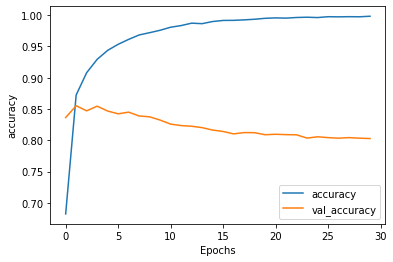

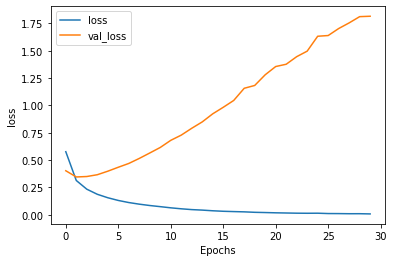

In [19]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")